# <font face="gotham" color="Green">  Fitts Law Regressor </font> 

## 🔑 Introduction

### 💻 Fitts's law

In this exercise, we are going to use the key concept from human-interaction  theory - the [Fitts's](https://en.wikipedia.org/wiki/Fitts%27s_law) law.

🤓 ~~Dry~~ theory:

Fitts’ law states that the amount of time required for a person to move a pointer (e.g., mouse cursor) to a target area is a function of the distance to the target divided by the size of the target. Thus, the longer the distance and the smaller the target’s size, the longer it takes.

⛔ It is important to mention that constants are always picked manually in the formula below since the problem of computing all possible combinations is [NP-hard](https://en.wikipedia.org/wiki/NP-hardness).

🧐 Minute of history:

In 1954, psychologist Paul Fitts, examining the human motor system, showed that the time required to move to a target depends on the distance to it, yet relates inversely to its size. By his law, fast movements and small targets result in greater error rates, due to the speed-accuracy trade-off. Although multiple variants of Fitts’ law exist, all encompass this idea.

![fits formula](imgs/fits_formula.png)

Fitts' law is applicable to rapid, pointing
movements: the longer the distance to a target and the smaller the
target size, the longer it takes to reach that target. To actually use
this law in practice, HCI researchers must estimate the two constants that
depend on the choice of input device, therefore, in this excercise will develop a
regression model for computer mice so that they do not have to derive
such device-dependent constants anymore.


![Fits example](imgs/fit.png)

## 1. Import dependencies

In [16]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.models import Sequential



from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping
import matplotlib.pyplot as plt


## 2. Load data 

🚩 The data contains four key features:
* the distance between different points on the screen
* width of the screen
* id
* transition time from one point to another

In [2]:
df = pd.read_csv('fitts-gen.csv', sep = ' ')
df

,distance,width,id,time
0,13,80,0.217231,104.315694
1,67,73,0.939458,196.151042
2,48,29,1.408806,273.344082
3,44,9,2.557995,445.222458
4,96,41,1.740480,326.544789
...,...,...,...,...
495,96,41,1.740480,304.099924
496,20,20,1.000000,209.636441
497,90,46,1.563901,281.754316
498,75,57,1.211504,239.717690


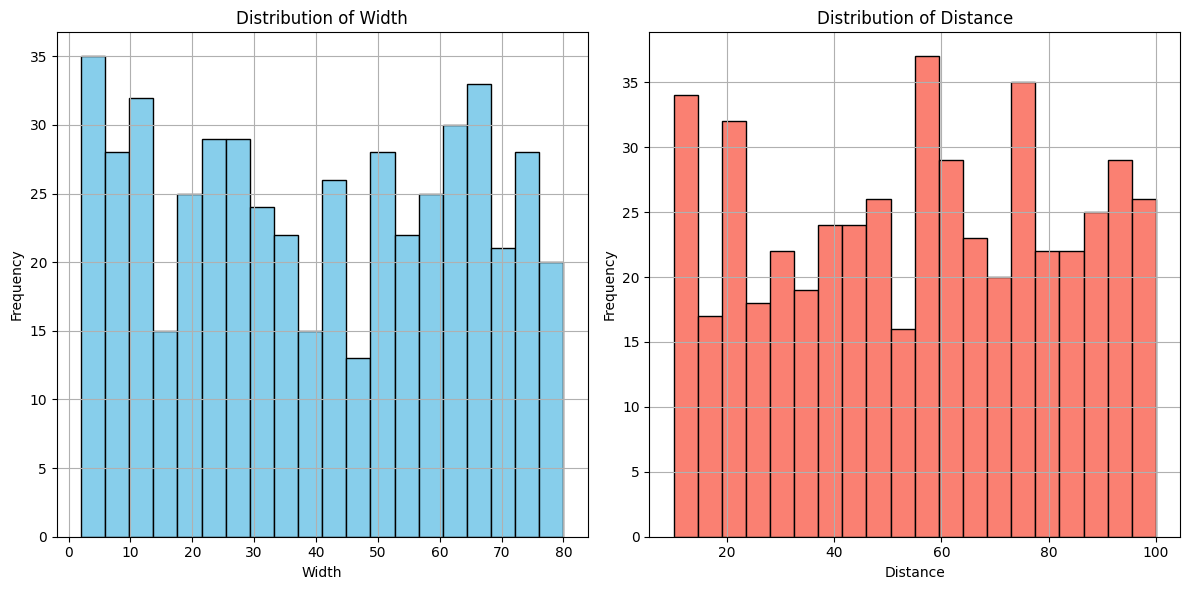

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# distribution of width
axes[0].hist(df['width'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Width')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# distribution of distance
axes[1].hist(df['distance'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Distance')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [4]:
def load_dataset(filename):
    X, y = [], []
    with open(filename) as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=' ')
        for row in csv_reader:
            w, d, t = int(row['width']), int(row['distance']), float(row['time'])
            X.append([w, d])
            y.append(t)
    X, y = np.array(X), np.array(y)
    return X, y

In [5]:
filename = 'fitts-gen.csv'
X,y = load_dataset(filename)

In [6]:
X.shape

(500, 2)

In [7]:
y.shape

(500,)

## ⚡3. Create Model 

A neural network with a linear activation function is simply a linear regression model. It has limited power and the ability to handle complexity varying parameters of input data. It takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input. In one sense, a linear function is better than a step function because it allows multiple outputs, not just yes and no.

However, a linear activation function has two major problems:

1. Not possible to use [backpropagation](https://en.wikipedia.org/wiki/Backpropagation)  (gradient descent) to train the model—the derivative of the function is a constant, and has no relation to the input. So it’s not possible to go back and understand which weights in the input neurons can provide a better prediction.
  
2. All layers of the neural network collapse into one—with linear activation functions, no matter how many layers in the neural network, the last layer will be a linear function of the first layer (because a linear combination of linear functions is still a linear function). So a linear activation function turns the neural network into just one layer.

🔔You are encouraged to try another activation function.


Here, we use *optimizer='rmsprop'*, but you can try [more](https://keras.io/optimizers/#rmsprop) and compare the results.


The MSE, MAE (also RMSE and R-Squared) metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

* <font color=lightgreen>MAE</font> (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

* <font color=lightblue>MSE</font> (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.


![MAE, MSE](https://econbrowser.com/wp-content/uploads/2019/07/msemae.png')

In [8]:
def create_model(dim):
    model = Sequential()
    model.add(Dense(dim, activation="relu", input_dim=dim))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mse'])
    return model

## ⚡4. Model Training

In [29]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that th

In [15]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [14]:
!pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that th

In [17]:
# Create partitions.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=1)

# Set callbacks, for monitoring progress.
cb_tensorboard = TensorBoard(log_dir='/tmp/fitts_logs')
cb_earlystopping = EarlyStopping(patience=80)

# Train the model.
model = create_model(X_train.shape[1])
print(model.summary())
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[cb_tensorboard, cb_earlystopping]
)

# Evaluate the model.
loss, mae, mse = model.evaluate(X_test, y_test)
print('MAE: {:.2f}, MSE: {:.2f}'.format(mae, mse))

# Save the model.
model.save('Models/fitts_model.h5')


2024-02-12 14:21:24.501408: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-02-12 14:21:24.501666: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-02-12 14:21:24.502073: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

## 💎 5. Model testing

<font color=green>R-Squared</font> (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. Usually, the value from 0 to 1 if there no additional constraints. The higher the value is, the better the model is. You can see an adjusted version of R-Squared in the Figure below.

![Rsq](https://i.stack.imgur.com/xb1VY.png)

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. You will find a simple example of using this technique below.

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.python.keras.models import load_model
#from fitts_train import load_dataset

R-squared: -0.29694022196676073


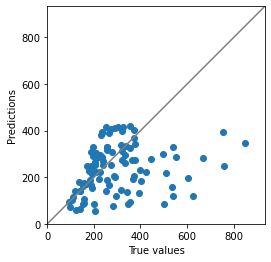

In [22]:
dataset_file = 'fitts-gen.csv'
X, y = load_dataset(dataset_file)

# Create partitions.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

model = load_model('Models/fitts_model.h5', compile=False)
y_pred = model.predict(X_test)

# Evaluate the quality of the fit.
print('R-squared:', r2_score(y_test, y_pred))

# Plot predictions against ground-truth.
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('square')
# Add some padding to the plot so that all the data can fit in well.
max_val = 1.1 * max(y_test.max(), y_pred.max())
plt.xlim([0, max_val])
plt.ylim([0, max_val])
# Add a diagonal line to appreciate better the predictions.
plt.plot([0, max_val], [0, max_val], color='gray')
plt.scatter(y_test, y_pred)
# Save as PNG file and display plot.
plt.savefig('Models/fitts.png')
plt.show()

🆘 As you can see R-Squared is negative. You might wonder at this point, how it can be negative?

In fact, R-Squared compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R-Squared is negative. Note that R-Squared is not always the square of anything, so it can have a negative value without violating any rules of math. R-Squared is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

💡 To sum up, a <font color=red>negative R-Squared</font> is not a mathematical impossibility or the sign of a bug. It simply means that the chosen model (with its constraints) fits the data really poorly.

## 🏁 6. Conclusion

Now, you know:

1.   How to apply linear model according to Fitt's law.
2.   How to scale the data using MinMaxScaler from Sk-learn.
3.   How to use different regression metrics and how to interpret them.
3.   How to work with different parameters of the model.

